# Analysis of the Global Covid-19 Vaccination Progress

This Notebook analyzes the progress of covid vaccination in different countries by investigation the [COVID-19 World Vaccination Progress Dataset](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) from [Our World Data](https://ourworldindata.org/). The data is enriched with [GDP per Capita Information](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) provided by the world bank and [country population information](https://population.un.org/wpp/Download/Standard/CSV/) provided by the United Nations. The enriched data allows insights into the demographic and economic situations of the analysed countries and their progress on vaccinating their citizens. The data is being transformed to optimize the analytical insights.

The notebook is structured as followed:
* **Business Understanding**
    * Describing the situation and project goals
    * Questions to be answered


* **Data Understanding**
    * Data Access
    * Data Exploring
  
  
* **Prepare Data**
    * Reading and merging the collected datasets
        * Merge Datasets and drop unused columns
        * Drop columns with missing values
        * Transform categorical values (vaccines column) 
   
   
* **Data Modeling**: Deliver insights into the data by analysing the following points:
    * Recent Daily Vaccinations per million citizens per country
    * US Daily Vaccination Rate
    * Association between GDP per Capita and percent of vaccinated citizens
    * Association between population size and percent of vaccinated citizens
    * Regression Coefficients for population size, GDP per Capita and population density
    * Vaccines Analysis: Are there vaccines mainly accessible for countries with a high GDP per Capita?


* **Evaluation**

## Business Understanding
### Describing the situation and project goals

Countries all over the world face difficult challenges during their fight against further Covid-19 spreading and try to protect their citizens as much as possible. The currently released vaccines are the new hope in order to defeat the virus and every country is trying to vaccinate as much people as possible in a short amount of time. This strategy brings new challenges with huge efforts needed in logistics and organisation. A race for vaccines has started between nations and million of people need to get vaccinated while prioritizing the risk groups. Important parameters that define the position of a country in this situation is its population size and wealthyness. Which countries are doing best compared globally? What influences the number of people that can get vaccinated daily? And do wealthy nations have easier access to the vaccines than others? These questions will be answered in this notebook.

### Questions to be answered
* Association between GDP per Capita and percentage of vaccinated citizens
* Association between population size and percentage of vaccinated citizens
* Regression Coefficients for population size, GDP per Capita and population density
* Vaccines Analysis: Are there vaccines mainly accessible for countries with a high GDP per Capita?



## Data Understanding
### Data Access

Load the necessary libraries and access the data

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.0.5
1.18.5
3.2.2
0.11.1
0.23.1


In [26]:
#Read in the Datasets

df=pd.read_csv('.\data\country_vaccinations.csv')
df_gdp=pd.read_csv('.\data\country_gdp.csv',delimiter=';')
df_pop=pd.read_csv('.\data\country_population.csv')
available_countries=list(df.country.unique())

### Data Exploring

Investigate the accessed data

In [21]:
print('Shape of dataset:',df.shape,df_gdp.shape,df_pop.shape)
print('\n Columns in dataset:',df.columns)
print('\n Available Countries:',available_countries)

Shape of dataset: (1427, 15) (264, 3) (280932, 10)

 Columns in dataset: Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

 Available Countries: ['Argentina', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'England', 'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'Northern Ireland', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia', 'S

In [22]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [23]:
df_gdp.head()

,Country Name,Indicator Name,2019
0,Aruba,GDP per capita (current US$),NaN
1,Afghanistan,GDP per capita (current US$),507.103432
2,Angola,GDP per capita (current US$),2790.726615
3,Albania,GDP per capita (current US$),5353.244856
4,Andorra,GDP per capita (current US$),40886.391160


In [24]:
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


## Prepare Data
### Reading and merging the collected datasets
* Merge Datasets and drop unused columns
* Drop columns with missing values
* Transform categorical values (vaccines column) 

In [5]:
#Merge datasets for analysis (gdp)
df_gdp=df_gdp.rename(columns={'Country Name':'country'})
df_merged=pd.merge(df,df_gdp,on=['country'],how='inner')
df_merged['date']=pd.to_datetime(df_merged['date'])

#check missing countries
merged_countries=list(df_merged.country.unique())
print('Failed to merge Countries:',set(available_countries)-set(merged_countries))
df_merged.shape

Failed to merge Countries: {'Wales', 'England', 'Northern Ireland', 'Scotland'}


(1266, 17)

In [6]:
#Clean missing data and drop columns
df_merged=df_merged.drop(columns=['daily_vaccinations_raw','source_name','source_website','Indicator Name','people_vaccinated','people_fully_vaccinated','people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred'])

#Remove rows with "total/daily vaccinations" and GDP missing
df_cleaned=df_merged.dropna(axis=0,subset=['total_vaccinations','daily_vaccinations','2019'])
df_cleaned=df_cleaned.rename(columns={'2019':'GDP_per_Capita'})
df_cleaned.isnull().sum()

country                           0
iso_code                          0
date                              0
total_vaccinations                0
daily_vaccinations                0
total_vaccinations_per_hundred    0
daily_vaccinations_per_million    0
vaccines                          0
GDP_per_Capita                    0
dtype: int64

Why the rows with missing values can be dropped:

This approach was applied because the values for 'total_vaccinations','daily_vaccinations' and 'GDP_per_Capita' are the central focus of the analysis.
Rows that do not contain these values will not be included in the analysis and can therefore be dropped.

In [7]:
#filter and join population size data (only most recent number relevant)
sorted = df_pop.sort_values(by='Time')
df_pop_filtered = sorted.drop_duplicates('Location', keep='last')
df_pop_filtered=df_pop_filtered.rename(columns={'Location':'country'})

In [8]:
df_tot=pd.merge(df_cleaned,df_pop_filtered,on=['country'],how='inner')
df_tot=df_tot.drop(columns=['LocID','VarID','Variant','Time','MidPeriod','PopMale','PopFemale'])

df_tot.head()

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,vaccines,GDP_per_Capita,PopTotal,PopDensity
0,Argentina,ARG,2020-12-31,32013.0,15656.0,0.07,346.0,Sputnik V,9912.281809,56802.493,20.756
1,Argentina,ARG,2021-01-04,39599.0,6483.0,0.09,143.0,Sputnik V,9912.281809,56802.493,20.756
2,Argentina,ARG,2021-01-08,107542.0,10519.0,0.24,233.0,Sputnik V,9912.281809,56802.493,20.756
3,Argentina,ARG,2021-01-13,166833.0,13323.0,0.37,295.0,Sputnik V,9912.281809,56802.493,20.756
4,Argentina,ARG,2021-01-15,200759.0,13317.0,0.44,295.0,Sputnik V,9912.281809,56802.493,20.756


In [27]:
# 0/1 encode categorical values of the vaccines column for further analysis

df_tot['Pfizer']=df_tot['vaccines'].apply(lambda x: 1 if 'Pfizer/BioNTech' in x else 0)
df_tot['Sinopharm']=df_tot['vaccines'].apply(lambda x: 1 if 'Sinopharm' in x else 0)
df_tot['Moderna']=df_tot['vaccines'].apply(lambda x: 1 if 'Moderna' in x else 0)
df_tot['Sinovac']=df_tot['vaccines'].apply(lambda x: 1 if 'Sinovac' in x else 0)
df_tot['Astra']=df_tot['vaccines'].apply(lambda x: 1 if 'Oxford/AstraZeneca' in x else 0)

In [28]:
#Investigate the data
df_tot.describe()

,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,GDP_per_Capita,PopTotal,PopDensity,Pfizer,Sinopharm,Moderna,Sinovac,Astra
count,8.030000e+02,803.000000,803.000000,803.000000,803.000000,8.030000e+02,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,3.951962e+05,27677.678705,2.279776,1481.927771,31323.564272,5.004936e+04,226.336613,0.937733,0.073474,0.281445,0.031133,0.019925
std,1.046660e+06,58432.513782,5.286618,2875.584648,19769.916645,2.283429e+05,511.712956,0.241790,0.261076,0.449984,0.173786,0.139831
min,6.000000e+00,1.000000,0.000000,0.000000,2099.599048,7.561500e+01,4.551000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.828100e+04,1848.000000,0.255000,272.000000,15731.016030,3.829211e+03,24.169000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.328000e+04,5857.000000,0.730000,659.000000,23503.977130,1.038790e+04,75.213000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.489120e+05,27754.500000,1.640000,1087.000000,46194.725230,2.871089e+04,184.329000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.500000e+07,714286.000000,41.770000,19604.000000,114704.594200,2.181574e+06,6484.990000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Modeling 
#### Recent Daily Vaccinations per million citizens per country
Which countries are vaccinating the highest percentage of their citizens every day?

In [12]:
#Current Vaccination Status per country
sorted = df_tot.sort_values(by='date')
df_recent = sorted.drop_duplicates('country', keep='last')
df_recent = df_recent.sort_values(by='daily_vaccinations_per_million')

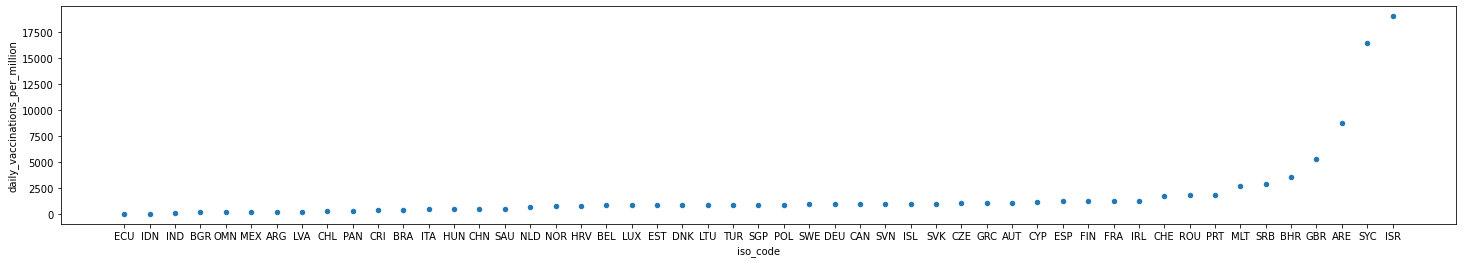

In [13]:
curr=df_recent[['daily_vaccinations_per_million','iso_code']]
curr.plot.scatter(x='iso_code',y='daily_vaccinations_per_million',figsize=(25,4))

The visual shows that some outlier countries are vaccinating significantly faster than the majority of the nations.

#### US Daily Vaccination Rate
How fast is the US improving their daily vaccination numbers?

In [14]:
df_US=df_cleaned[df_cleaned['country']=='United States'][['date','daily_vaccinations']]

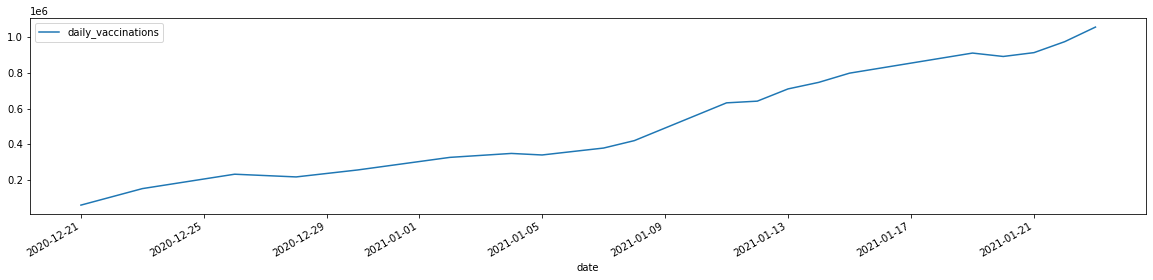

In [15]:
df_US.plot(x='date',y='daily_vaccinations',figsize=(20,4))

The figure shows that the vaccination rate is increasing strongly every day since the government is trying to optimize logistics and organisation.

#### Association between GDP per Capita and percent of vaccinated citizens
Are wealthy nations able to vaccine more citizens than countries?

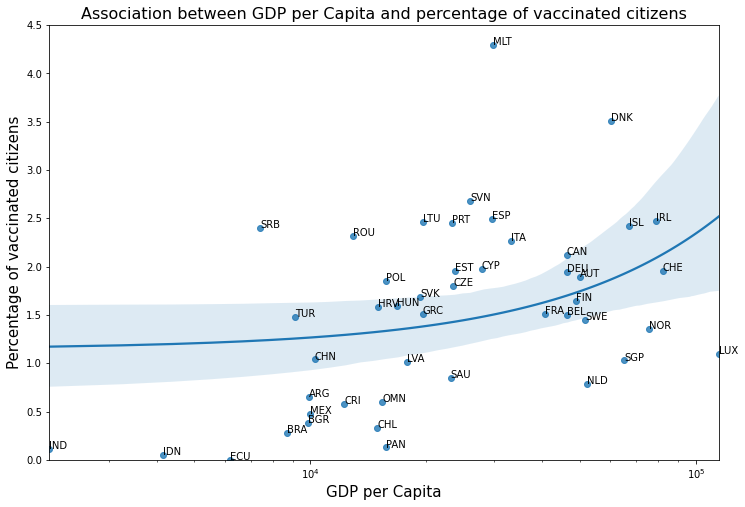

In [17]:
def label_point(x, y, val, ax):
  """ 
  This function is used to label the points in a scatter plot.
  @param x: X-Axis Data
  @param y: Y-Axis Data
  @param val: Text label
  @param ax: plotting method
  """
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
df_recent = df_recent.sort_values(by='GDP_per_Capita')
curr=df_recent[['GDP_per_Capita','iso_code','total_vaccinations_per_hundred']]

#remove outliers
curr=curr[~curr['iso_code'].isin(['ISR','ARE','SYC','GBR','BHR'])]

plt.figure(figsize=(12,8))

splot=sns.regplot(data=curr,x='GDP_per_Capita',y='total_vaccinations_per_hundred')
splot.set(xscale='log',ylim=[0,4.5])
label_point(curr.GDP_per_Capita, curr.total_vaccinations_per_hundred, curr.iso_code, plt.gca())
splot.axes.set_title("Association between GDP per Capita and percentage of vaccinated citizens",fontsize=16)
splot.set_xlabel('GDP per Capita',fontsize=15)
splot.set_ylabel('Percentage of vaccinated citizens',fontsize=15)

fig=splot.get_figure()
fig.savefig("GDP_vs_PercVacc.png")

The visual shows that with an increasing GDP per Capita, countries seem to be able to vaccinate faster.

#### Association between population size and percent of vaccinated citizens

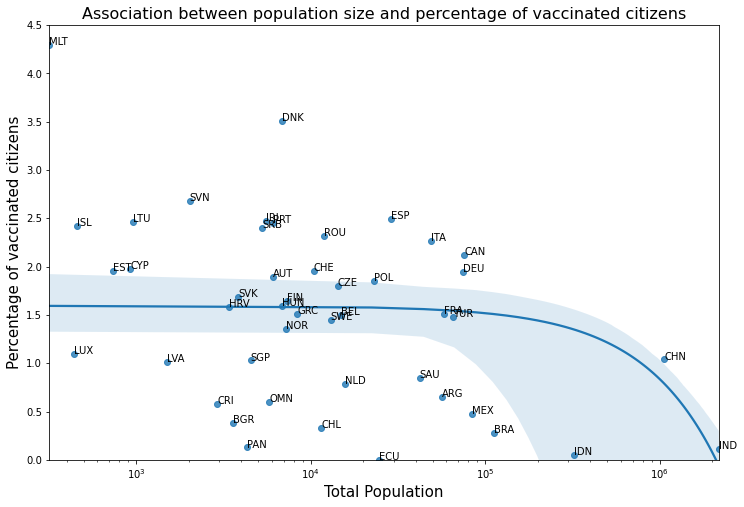

In [15]:
df_recent = df_recent.sort_values(by='PopTotal')
curr=df_recent[['PopTotal','iso_code','total_vaccinations_per_hundred']]

#remove outliers
curr=curr[~curr['iso_code'].isin(['ISR','ARE','SYC','GBR','BHR'])]

plt.figure(figsize=(12,8))

splot=sns.regplot(data=curr,x='PopTotal',y='total_vaccinations_per_hundred')
splot.set(xscale='log',ylim=[0,4.5])
label_point(curr.PopTotal, curr.total_vaccinations_per_hundred, curr.iso_code, plt.gca()) 
splot.axes.set_title("Association between population size and percentage of vaccinated citizens",fontsize=16)
splot.set_xlabel('Total Population',fontsize=15)
splot.set_ylabel('Percentage of vaccinated citizens',fontsize=15)

fig=splot.get_figure()
fig.savefig("PopSize_vs_PercVacc.png")

The figure indicates no relationship between the Total population size and percentage of vaccinated citizens up to around around 80 Million citizens. Countries exceeding this population size seem to have higher logistic hurdles than smaller countries.

#### Regression Coefficients for population size, GDP per Capita and population density

In [16]:
y=np.array(df_recent[['total_vaccinations_per_hundred']])
X=np.array(df_recent[['GDP_per_Capita','PopTotal','PopDensity']])

In [17]:
reg = LinearRegression().fit(X, y)

In [18]:
reg.coef_

array([[ 2.32138617e-05, -1.63475623e-06,  2.81426369e-04]])

The regression coefficients indicate a positive relationship for GDP per Capita and the population density and a negative relationship for the total population size. It seems that countries with a high population density spend a lot of effort to vaccinate their citizens fast.

#### Vaccines Analysis

Are there vaccines that are mostly available to countries with high GDP per Capita?

In [19]:
df_recent['vaccines'].value_counts()

Pfizer/BioNTech                          30
Moderna, Pfizer/BioNTech                 10
Sinovac                                   3
Pfizer/BioNTech, Sinopharm                2
Oxford/AstraZeneca, Pfizer/BioNTech       1
Sinopharm                                 1
Sputnik V                                 1
Covaxin, Covishield                       1
CNBG, Sinovac                             1
Pfizer/BioNTech, Sinopharm, Sputnik V     1
Name: vaccines, dtype: int64

In [20]:
vaccines=['Pfizer','Sinopharm','Moderna','Sinovac','Astra']
avg_gdp=[]
nr_countries=[]
for i in vaccines:
    tot=0
    n=0
    for k,j in enumerate(df_recent['GDP_per_Capita']):
        if df_recent[i].iloc[k]==1:
            n+=1
            tot+=j
    avg=tot/n
    avg_gdp.append(avg)
    nr_countries.append(n)
    print('{} is used by {} countries and avg gdp is {}'.format(i,n,avg))

Pfizer is used by 44 countries and avg gdp is 35142.85226397728
Sinopharm is used by 4 countries and avg gdp is 22866.851649
Moderna is used by 10 countries and avg gdp is 39820.356415500006
Sinovac is used by 4 countries and avg gdp is 8060.249034249999
Astra is used by 1 countries and avg gdp is 42330.11754


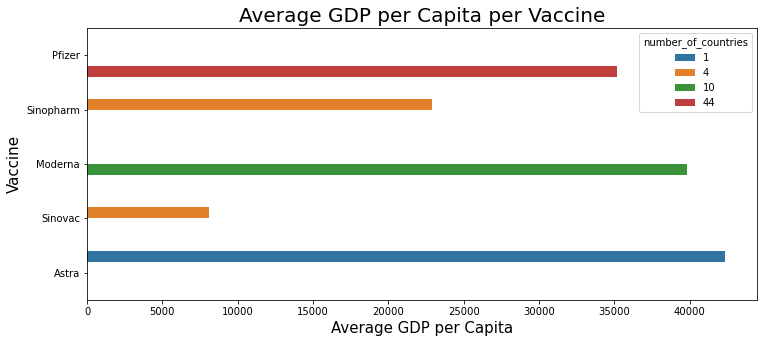

In [21]:
d={'Vaccine':vaccines,'avg_gdp':avg_gdp,'number_of_countries':nr_countries}
df=pd.DataFrame(d)
plt.figure(figsize=(12,5))
splot=sns.barplot(data=df,x='avg_gdp',y='Vaccine',hue='number_of_countries')
splot.axes.set_title("Average GDP per Capita per Vaccine",fontsize=20)
splot.set_xlabel('Average GDP per Capita',fontsize=15)
splot.set_ylabel('Vaccine',fontsize=15)
fig=splot.get_figure()
fig.savefig("Vacc_plot.png")

Pfizer is a very popular vaccine and used by many countries. Moderna is mainly used by North American and Western Europe countries. While Sinovac and Sinopharm are popular in Asia and Eastern Europe.

## Evaluation

Countries with a high GDP per Capita seem to be able to vaccinate their citizens faster than other countries. However, given the regression coefficent the population density plays an even more important role. It seems that countries with a high population density give strong effort in vaccinating their citizens as fast as possible. For countries with a total population above 100 Million, the logistics and organisational hurdles seem to slow down the process of vaccinating the citizens agains Covid-19.
Additional insights was provided by analysing the different vaccines. While Moderna is mainly used by North American and Western European countries, Sinovac and Sinopharm is popular in Asia.